In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import seaborn as sns

In [3]:
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams["font.size"] = 14

In [4]:
# data from the article

x_ , y_ =( 
[np.array([[0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ],
        [0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2. ]]),
 np.array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
        [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7],
        [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
        [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9],
        [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
        [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1],
        [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
        [1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3],
        [1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4],
        [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]])])

In [5]:
DATE_YYYYMMDD = 20130814
DATE_YYYYMMDD_SECOND = 20170519

DATE_FMT = "%Y%m%d"

def to_numpy_date(x):
    if isinstance(x, int):
        return np.datetime64(pd.to_datetime(x, format=DATE_FMT))
    else:
        return np.array([np.datetime64(pd.to_datetime(y, format=DATE_FMT)) for y in x])


INIT_DATE = to_numpy_date(DATE_YYYYMMDD)

In [6]:
ls

BlackScholes.R           FixedGeneration_3.ipynb            hybridSimulation.R
FixedGeneration_1.ipynb  FixedGeneration-OtherParams.ipynb  README.md
FixedGeneration_2.ipynb  generating_grid_mat_strikes.ipynb


In [7]:
df2 = pd.read_csv(f"../data/real_vol_surfaces/spxVols{DATE_YYYYMMDD_SECOND}.csv")
df2["ratio"] = df2.Strike / df2.Fwd


# df = pd.concat([df1, df2])

# df.drop(columns=["Unnamed: 0"], inplace=True)

In [8]:
unique_texp = np.unique(np.log(df2.Texp))

mat_idces = [0, 2, 5, 11, 20, 26, 32, 34]
assert len(mat_idces) == 8

maturities = np.exp(unique_texp[mat_idces])

strikes = np.linspace(-1, 0.4, 11)

xx, yy = np.meshgrid(maturities, strikes)

yy = np.exp(yy * np.sqrt(xx))

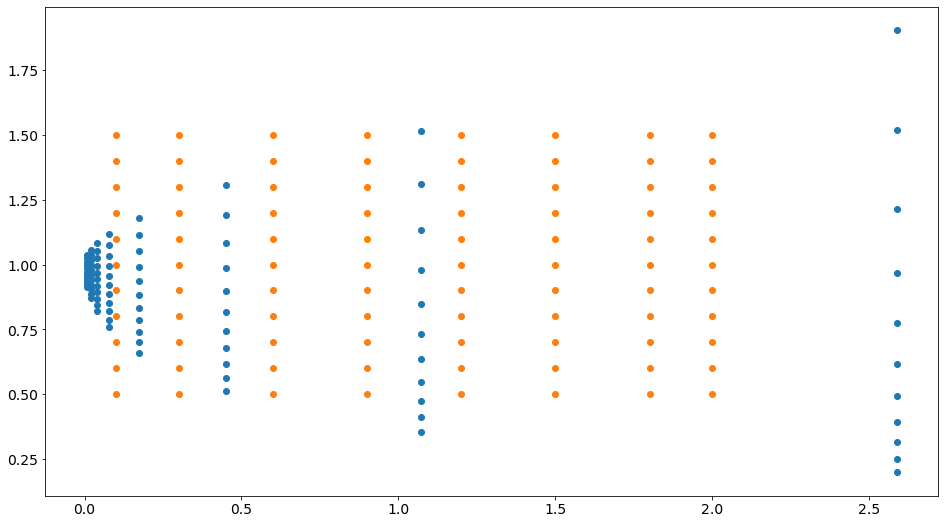

In [9]:
plt.scatter(xx, yy)
plt.scatter(x_, y_)

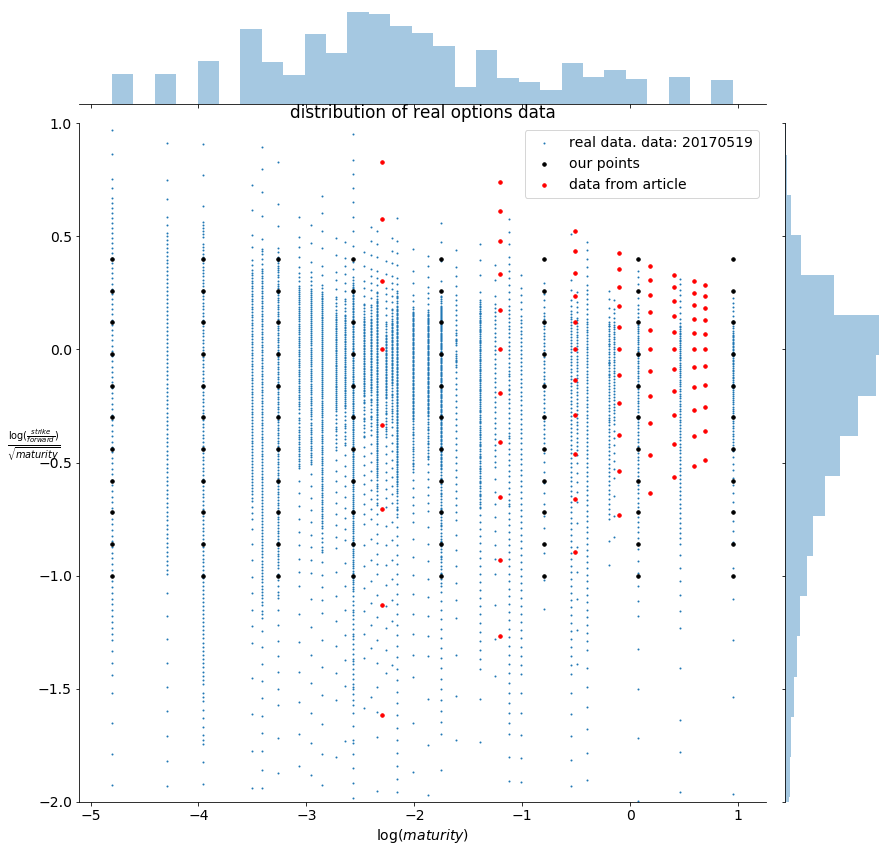

In [10]:
# fig, axis = plt.subplots(1, 1)

obj = sns.jointplot(np.log(df2.Texp), np.log(df2.ratio) / np.sqrt(df2.Texp),
            height=12, ratio=6,
             s=1, label=f"real data. data: {DATE_YYYYMMDD_SECOND}")


axis = obj.ax_joint
axis.set_title("distribution of real options data")

points_size = 12
axis.scatter(np.log(xx), np.log(yy) / np.sqrt(xx),
             c="k", s=points_size, label="our points")

axis.scatter(np.log(x_), np.log(y_) / np.sqrt(x_),
            label="data from article", c='r', s=points_size)

axis.set_ylabel(r"$\frac{\log{(\frac{strike}{forward})}}{\sqrt{maturity}}$", rotation=0)
axis.set_xlabel(r"$\log{(maturity)}$")

axis.set_ylim(-2, 1)
axis.legend()


fig = axis.get_figure()

fig.savefig("../images/mat_strike_grid.png")

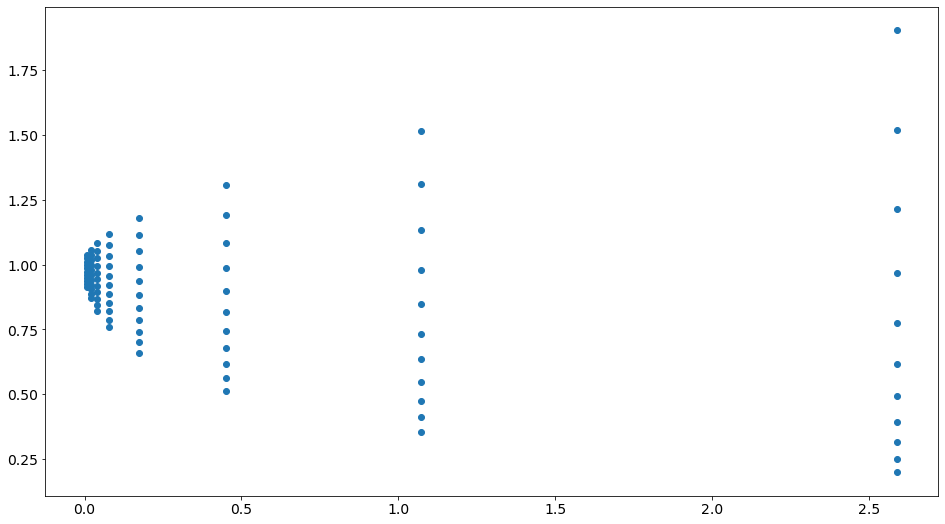

In [11]:
dim_m = 8  # maturities
dim_s = 11 # strikes
maturities_m = xx[0]
strikes_for_each_mat_sm = yy

# sanity check
plt.scatter(np.tile(maturities_m, dim_s), strikes_for_each_mat_sm)

data = pd.DataFrame(strikes_for_each_mat_sm.T, index=maturities_m)

data.index.name = "maturities"

data.to_csv("../data/new_data/maturity_strike_grid.csv")